<a href="https://colab.research.google.com/github/SarahLong4/PersonalProject/blob/Vader/Sentiment_Analysis_Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import vaderSentiment.vaderSentiment as vv
import pandas as pd
import tweepy
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
#Load the data 
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (1).csv


In [16]:
#Get the data 
log = pd.read_csv('Login.csv')

In [17]:
#Twitter API Creds
consumerKey = log['API Key'][0]
consumerSecret = log['API Key'][1]
accessToken = log['API Key'][2]
accessTokenSecret = log['API Key'][3]
clientID = log['API Key'][4]
clientIdSecret = log['API Key'][5]


In [18]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create API object while passing in the auth info
api = tweepy.API( authenticate, wait_on_rate_limit = True)


In [ ]:
#Upload the tweet ids
posts = api.user_timeline(screen_name = "POTUS", count = 100, lang = "en", tweet_mode = "extended")

#Print the last 5 twees from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i +1


In [ ]:
#Create a dataframe with a column called tweet
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns= ['Tweets'] )

#Show the first 5 rows of data
df.head()

In [ ]:
#Clean the text

#Create a  function to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @ mentions
  text = re.sub(r'#', '', text) #Removing the # symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing Retweet 
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing links

  return text #Return cleaned text

df['Tweets'] = df['Tweets'].apply(cleanText) #Cleaning the tweets

#Show the clean tweets
df

In [30]:

score = SentimentIntensityAnalyzer()

#Get the subjectivity 
def getSubjectivity(text):
 # s = score.polarity_scores(text)['compound']
  #sub = 1 -abs(s) # inverse of the absolute value of the compound score
  #return sub

#Get the polarity 
def getPolarity(text):
  return score.polarity_scores(text)['compound']

#Create new columns
df['Polarity'] = df['Tweets'].apply(getPolarity)
#df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

df

,Tweets,Polarity,Analysis,Subjectivity
0,I spoke today with Allies and partners to disc...,-0.4939,Negative,0.5061
1,"Tune in as , , , and I host a celebration to m...",0.0000,Neutral,1.0000
2,: As a result of Putin’s ongoing assault on Uk...,-0.5859,Negative,0.4141
3,Judge Jackson is a nominee worthy of Justice B...,0.9538,Positive,0.0462
4,"For too long, our government and our courts ha...",0.6705,Positive,0.3295
...,...,...,...,...
95,I spoke today with transatlantic leaders to di...,0.2263,Positive,0.7737
96,Here’s the deal: We can lower the cost of pres...,0.8834,Positive,0.1166
97,I ran for president because I believed governm...,0.7096,Positive,0.2904
98,"Last year, there were 55 Fortune 500 companies...",0.3612,Positive,0.6388


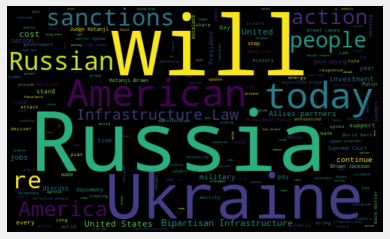

In [31]:
#Word Cloud plotting
allWords = ' '.join( [twts for twts in df['Tweets'] ] )
wordCloud = WordCloud(width =500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [32]:
#Create a function to get the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show dattaframe with analysis
df

,Tweets,Polarity,Analysis,Subjectivity
0,I spoke today with Allies and partners to disc...,-0.4939,Negative,0.5061
1,"Tune in as , , , and I host a celebration to m...",0.0000,Neutral,1.0000
2,: As a result of Putin’s ongoing assault on Uk...,-0.5859,Negative,0.4141
3,Judge Jackson is a nominee worthy of Justice B...,0.9538,Positive,0.0462
4,"For too long, our government and our courts ha...",0.6705,Positive,0.3295
...,...,...,...,...
95,I spoke today with transatlantic leaders to di...,0.2263,Positive,0.7737
96,Here’s the deal: We can lower the cost of pres...,0.8834,Positive,0.1166
97,I ran for president because I believed governm...,0.7096,Positive,0.2904
98,"Last year, there were 55 Fortune 500 companies...",0.3612,Positive,0.6388


In [ ]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j=j+1


In [ ]:
#Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
sortedDF = df.reset_index(drop =True)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1


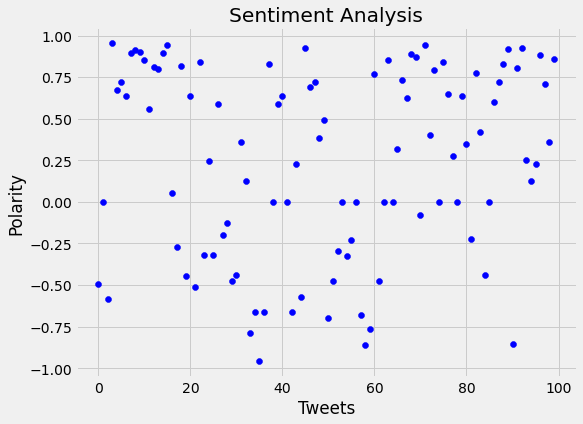

In [50]:
#Plot the polarity and tweets 
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(i, df['Polarity'][i], color = 'Blue')


plt.title('Sentiment Analysis')
plt.xlabel('Tweets')
plt.ylabel('Polarity')
plt.show()

In [36]:
#Get the percentage of positive tweets 
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

print('Percentage of positive tweets')
round((ptweets.shape[0] / df.shape[0]) *100, 1)

Percentage of positive tweets


60.0

In [37]:
#Get the percentage of negative tweets
negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['Tweets']

print('Percentage of negative tweets')
round( (negtweets.shape[0] / df.shape[0]) *100, 1)

Percentage of negative tweets


30.0

In [38]:
#Get the percentage of neutral tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

print('Percentage of neutral tweets')
round( (ntweets.shape[0] / df.shape[0]) *100, 1)

Percentage of neutral tweets


10.0

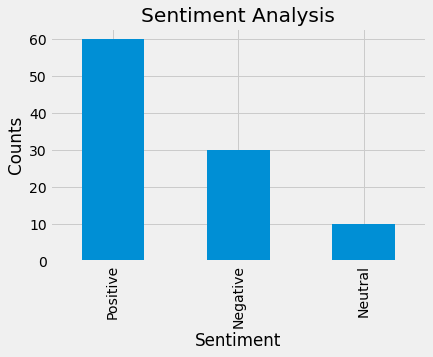

In [39]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
